In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
import seaborn as sns
color = sns.color_palette()
import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
#import pymc3                   as pm
#import theano.tensor           as tt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


Loading the dataset 

In [3]:
path = "water_potability.csv"
df = pd.read_csv(path)

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [ ]:
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [5]:
df.isna().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [6]:
df[df['Sulfate'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
phMean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = phMean_0
phMean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [8]:
print('Checking to see any more missing data \n')
df.isna().sum()

Checking to see any more missing data 



ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

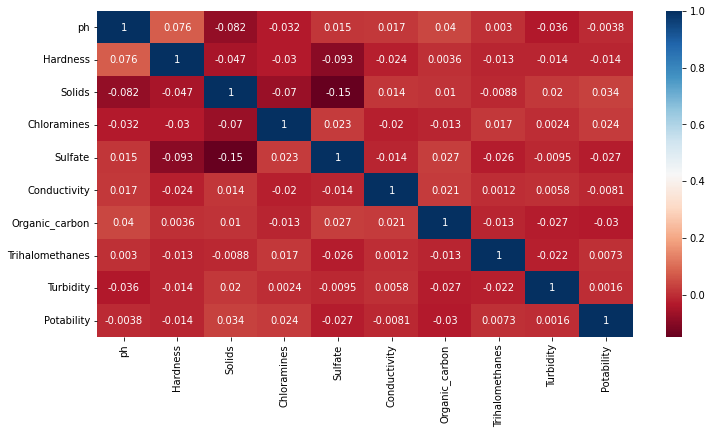

In [9]:
# checking the corealtion
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

In [10]:
fig =  ex.pie (df, names = "Potability", hole = 0.2, )
fig.show ()

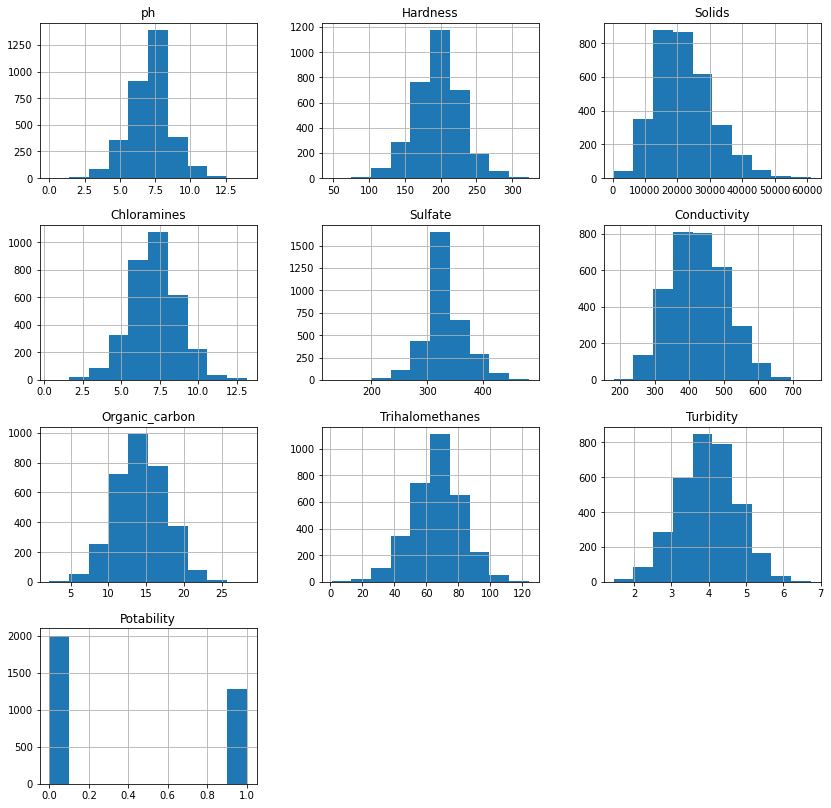

In [11]:
df.hist(figsize=(14,14))
plt.show()

Skewness

In [12]:
def print_skewness(df):
    skewness = df.skew()
    for col, value in skewness.items():
        if value > 0:
            print(f'{col} is positively skewed',value)
        elif value < 0:
            print(f'{col} is negatively skewed',value)
        else:
            print(f'{col} is neutral',value)


print_skewness(df)


ph is positively skewed 0.027672132589450768
Hardness is negatively skewed -0.0393417047767249
Solids is positively skewed 0.6216344855169127
Chloramines is negatively skewed -0.01209844012438221
Sulfate is negatively skewed -0.04195184491893259
Conductivity is positively skewed 0.2644902239264119
Organic_carbon is positively skewed 0.025532582090242492
Trihalomethanes is negatively skewed -0.08504236513157565
Turbidity is negatively skewed -0.007816642377392604
Potability is positively skewed 0.4507837491078628


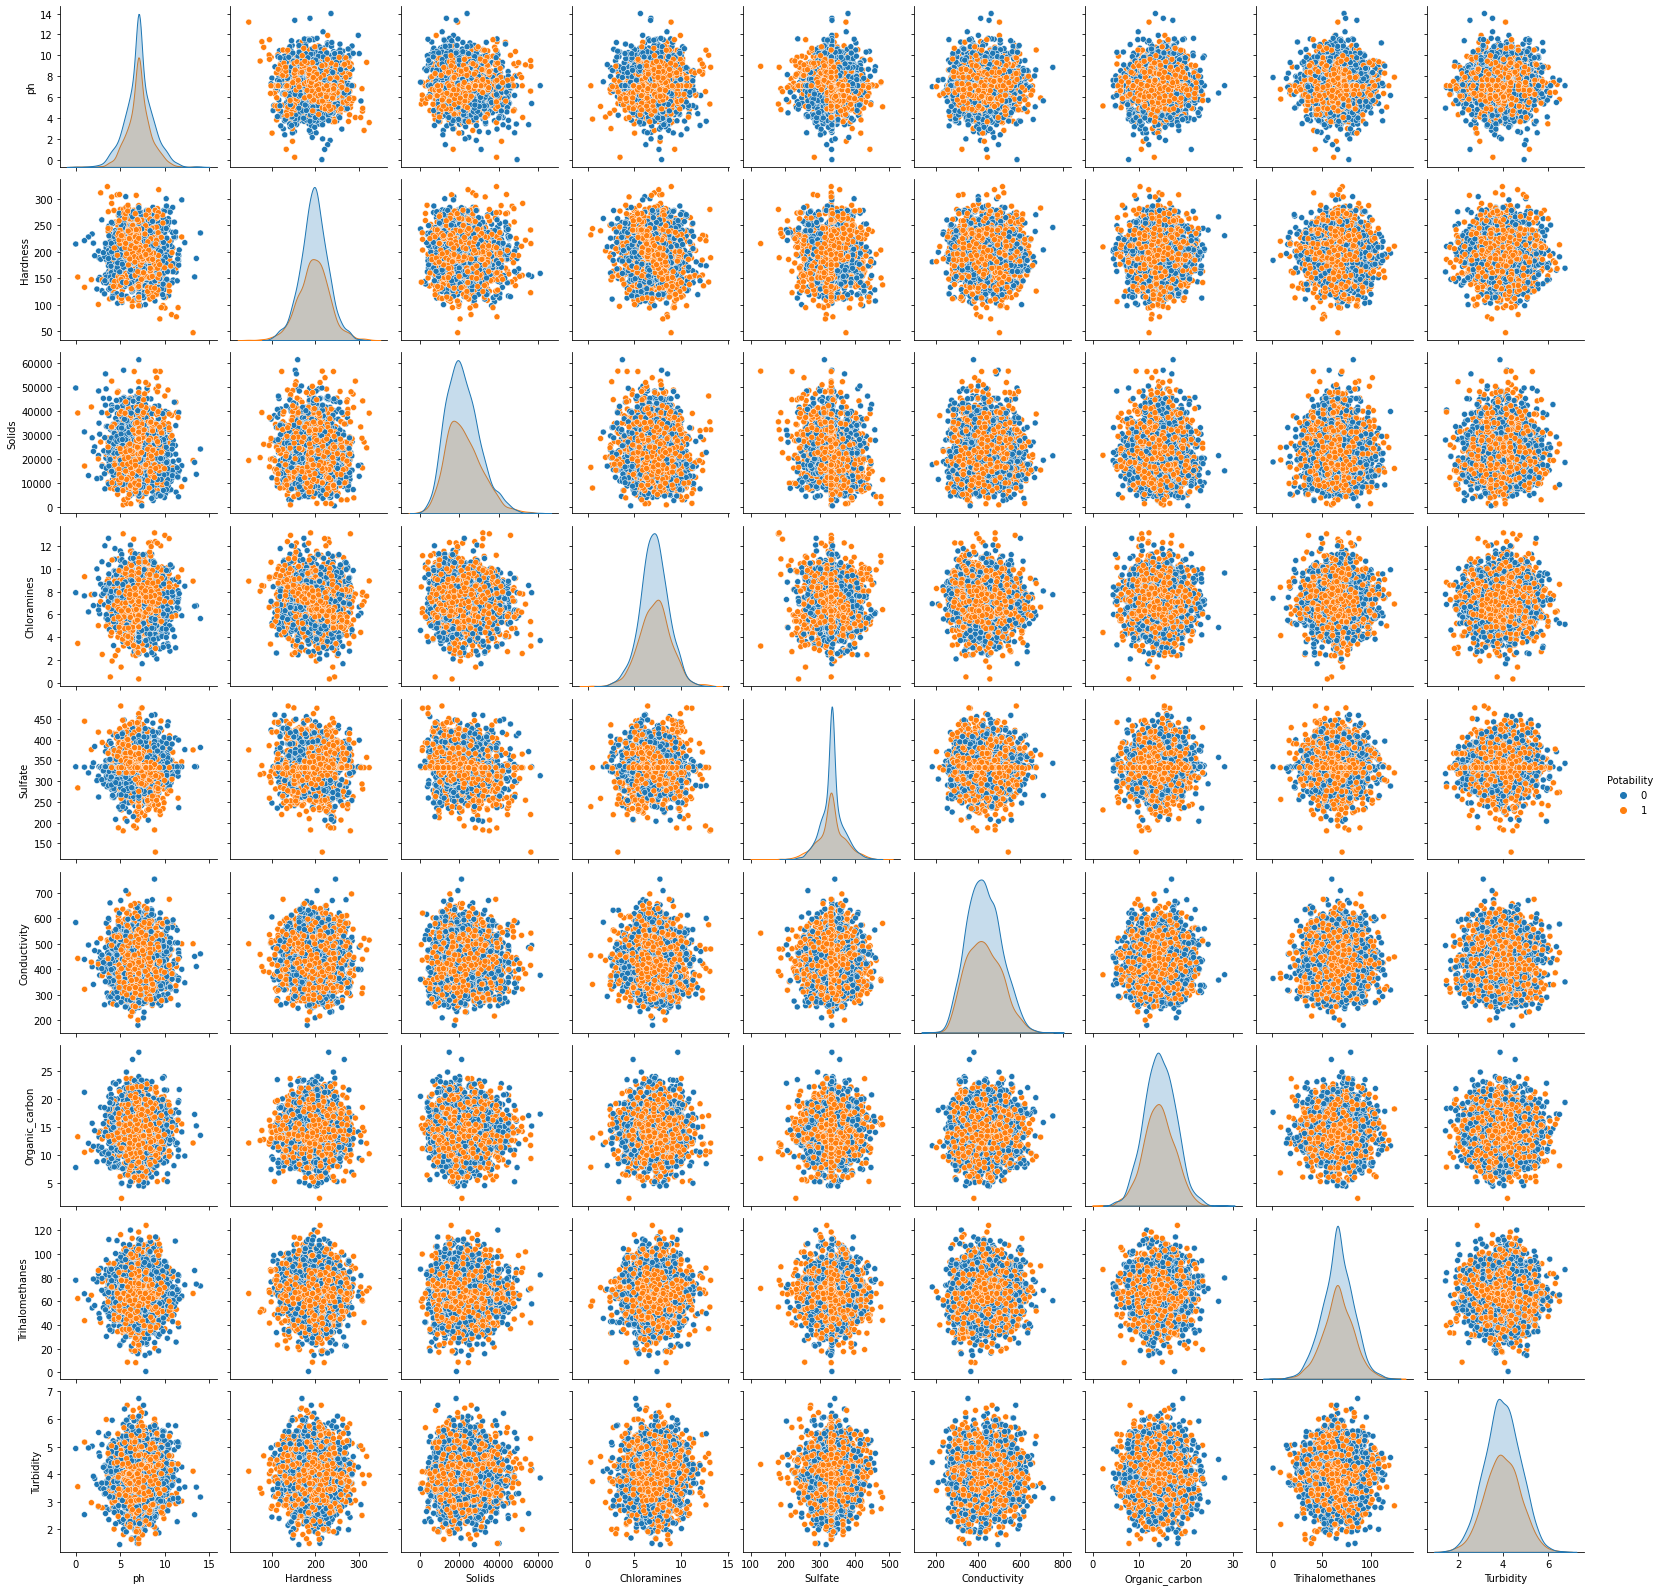

In [13]:
sns.pairplot(df,hue='Potability')

In [14]:
# defining function for EDA
def conti_var(x):

    fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,5),tight_layout=False)

    axes[0].set_title('Distribution')
    sns.histplot(x,ax=axes[0])
    axes[0].grid()

    axes[1].set_title('Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[1].grid()

    axes[2].set_title('relaation wrt to output variable')
    sns.boxplot(x=df.Potability,y=x,ax=axes[2])
    axes[2].grid()

    sns.distplot(x,ax=axes[3])
    axes[3].grid()
    
plt.show()

In [15]:
df1 = pd.DataFrame(df)

# Calculate the skewness of each column
skewness = df1.skew()

# Iterate over the skewness values and print the skewness type
for col, value in skewness.items():
    if value > 0:
        print(f'{col} is positively skewed----->',value)
    elif value < 0:
        print(f'{col} is negatively skewed----->', value)
    else:
        print(f'{col} is neutral---------------->',value)

ph is positively skewed-----> 0.027672132589450768
Hardness is negatively skewed-----> -0.0393417047767249
Solids is positively skewed-----> 0.6216344855169127
Chloramines is negatively skewed-----> -0.01209844012438221
Sulfate is negatively skewed-----> -0.04195184491893259
Conductivity is positively skewed-----> 0.2644902239264119
Organic_carbon is positively skewed-----> 0.025532582090242492
Trihalomethanes is negatively skewed-----> -0.08504236513157565
Turbidity is negatively skewed-----> -0.007816642377392604
Potability is positively skewed-----> 0.4507837491078628


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: Futur

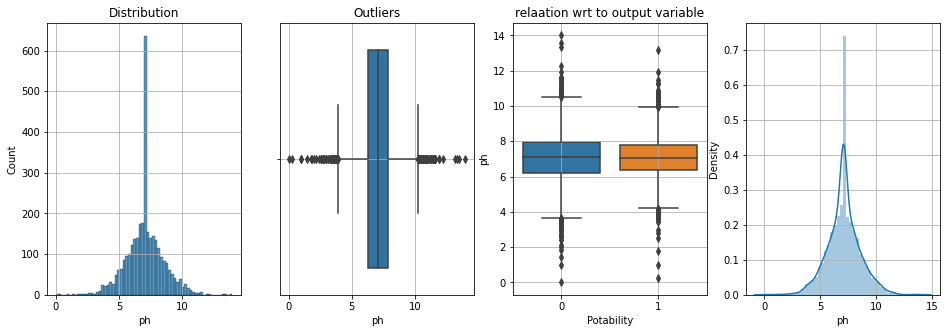

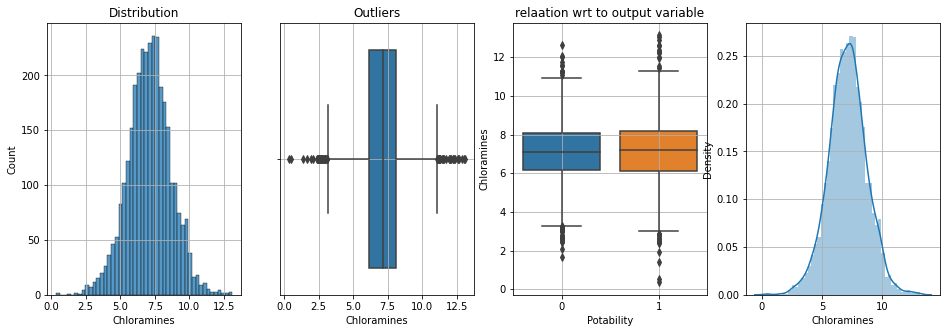

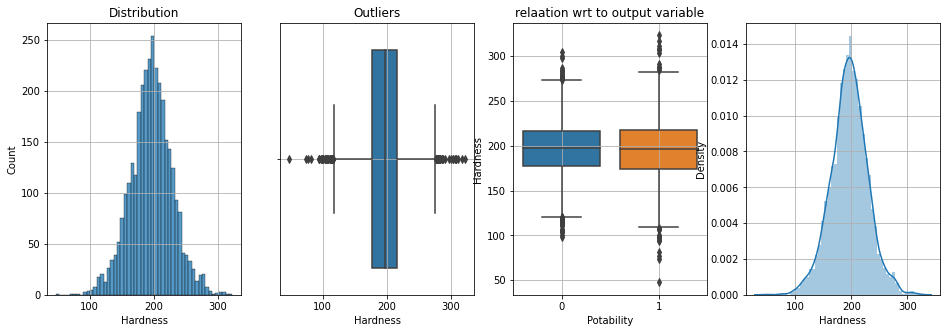

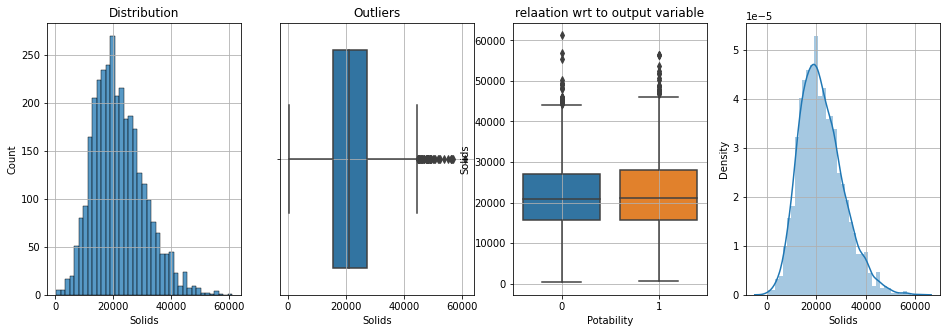

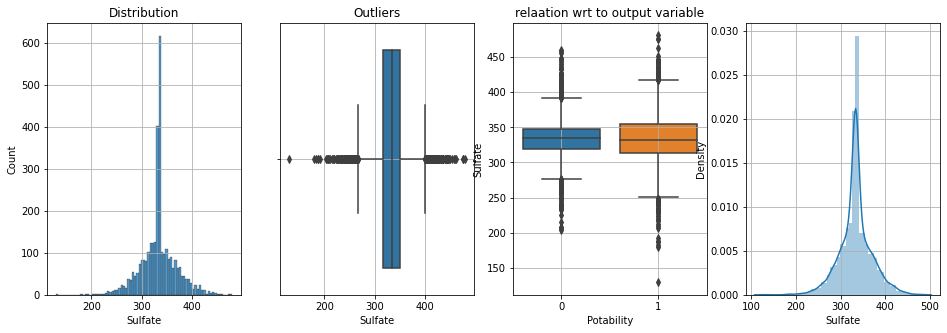

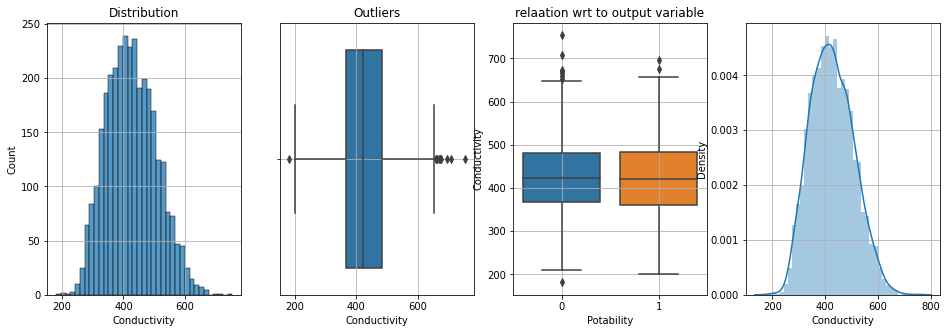

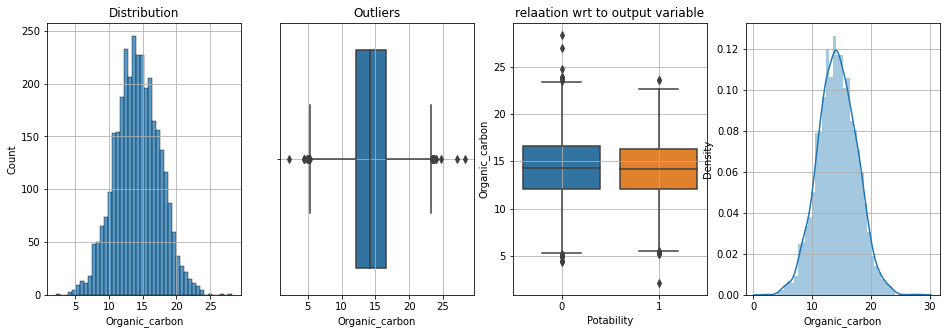

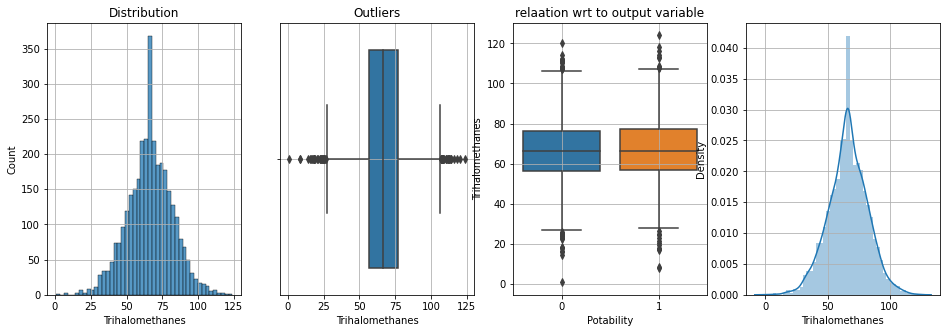

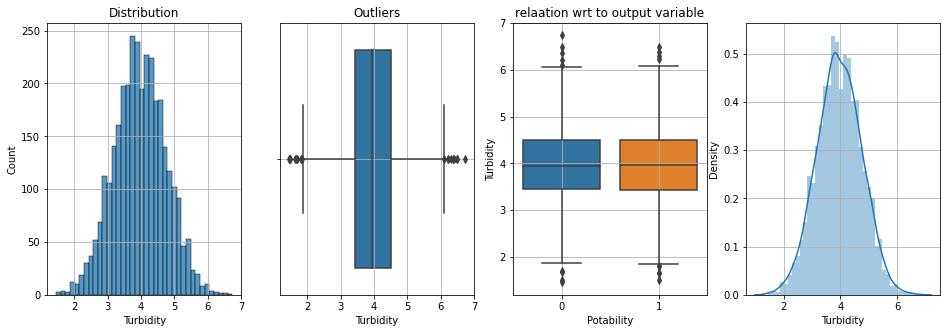

In [ ]:
#EDA of Ph variable
conti_var(df.ph)
#EDA of Chloramtes
conti_var(df.Chloramines)
#EDA of Hardness variable
conti_var(df.Hardness)
#EDA of solids
conti_var(df.Solids)
#EDA of sulfates
conti_var(df.Sulfate)
#EDA of Conductivity variable
conti_var(df.Conductivity)
# EDA of Organic_carbon variable
conti_var(df.Organic_carbon)
# EDA of Trihalomethanes variable
conti_var(df.Trihalomethanes)
# EDA of Turbidity variable
conti_var(df.Turbidity)

Handling outliers 

In statistics, we have three measures of central tendency namely Mean, Median, and Mode. They help us describe the data.

Mean is the accurate measure to describe the data when we do not have any outliers present.

Median is used if there is an outlier in the dataset.

Mode is used if there is an outlier AND about ½ or more of the data is the same.

‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

In [16]:
def remove_outliers(df, threshold=3):
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]

# remove outliers using threshold 3
df_out = remove_outliers(df)

# Print the DataFrame after removing outliers
print(df_out)



            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

feature Selection

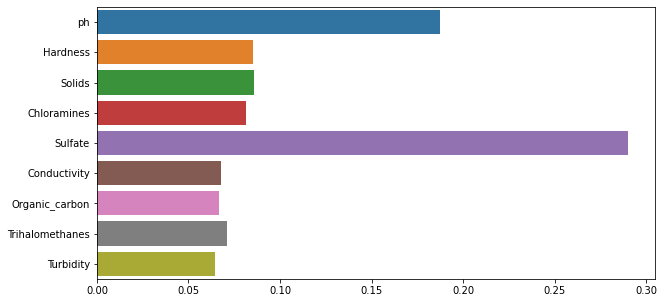

In [17]:
#Feature selection using random forest feature importance
#importing the libraries
from sklearn.ensemble import RandomForestClassifier

#initializing the model
ran = RandomForestClassifier()

#fitting the model
ran.fit(df_out.drop('Potability',axis=1),df_out.Potability)

plt.figure(figsize=(10,5))
sns.barplot(x=ran.feature_importances_,y=df_out.drop('Potability',axis=1).columns)
plt.show()

In [18]:
#splitting the data into input and output
x = df_out.drop(['Potability','Organic_carbon'],axis=1)
y = df_out.Potability

print('input shape={}, output shape={}'.format(x.shape,y.shape))

input shape=(3128, 8), output shape=(3128,)


In [ ]:
#Standard scalar is used to avoid scaling effect
#importing the libraries
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#fitting scalar model for input data
x = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

In [ ]:
#splitting entire data into 80% train and 20% test
# importing the libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

print('Shape of Splitting:')
print('x_train={},y_train={},x_test={},y_test={}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting:
x_train=(2502, 8),y_train=(2502,),x_test=(626, 8),y_test=(626,)


Model Selection


In [ ]:
model = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(),
        svm.LinearSVC(), XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, x_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

In [ ]:
print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 
                           'Test_Accuracy' : testAccuracy})
modelScore

The comparision



,Model,Train_Accuracy,Test_Accuracy
0,LogisticRegression(),0.610317,0.643770
1,DecisionTreeClassifier(),0.725029,0.730032
2,GaussianNB(),0.615925,0.638978
3,"(DecisionTreeClassifier(max_features='auto', r...",0.794188,0.792332
4,LinearSVC(),0.610317,0.643770
5,XGBClassifier(),0.784988,0.814696


**RANDOM FOREST** **CLASSIFIER** 

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       403
           1       0.75      0.65      0.70       223

    accuracy                           0.80       626
   macro avg       0.78      0.76      0.77       626
weighted avg       0.79      0.80      0.79       626

None


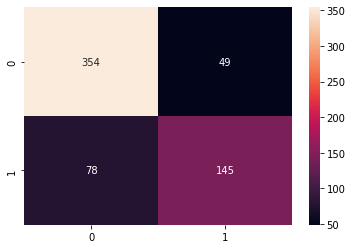

ROC curve :


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



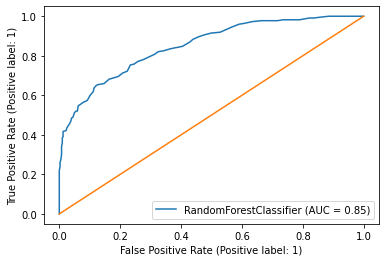

In [ ]:
print('Random Forest Classifier\n')
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score
modelAccuracy = list()
Rfc = RandomForestClassifier()
pred_Rfc=Rfc.fit(x_train, y_train)

y_Rfc = Rfc.predict(x_test)
print(metrics.classification_report(y_test, y_Rfc))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_Rfc)))

sns.heatmap(confusion_matrix(y_test, y_Rfc), annot=True, fmt='d')
plt.show()
#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(Rfc,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
#accuracy_score(y_test,pred_Rfc)

In [ ]:
#checking for hyper parameters
Rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best score = 0.7805755395683454
Best params = {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 300}
Report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       403
           1       0.77      0.61      0.68       223

    accuracy                           0.80       626
   macro avg       0.79      0.76      0.77       626
weighted avg       0.79      0.80      0.79       626

confusion matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



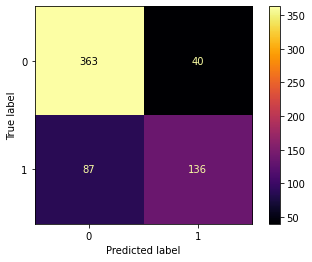

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



ROC curve :


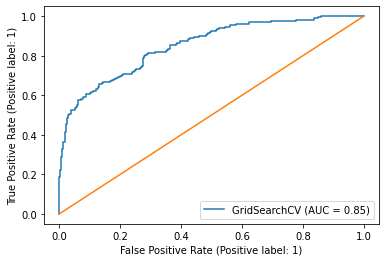

accuracy score of the model 0.7971246006389776


In [ ]:
#hyper parameters
params = {'max_depth':[15,20,25],
          'min_samples_leaf':[10,20,30],
          'min_samples_split':[10,20,30],
          'n_estimators' : [200,250,300]
         }
#initializing the grid
grid_Rfc = GridSearchCV(estimator=Rfc,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_Rfc = grid_Rfc.fit(x_train,y_train).predict(x_test)

#printing best score and parameters
print('Best score = {}\nBest params = {}'.format(grid_Rfc.best_score_,grid_Rfc.best_params_))

#printing the report
print('Report: \n',classification_report(y_test,pred_Rfc))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_Rfc,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grid_Rfc,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_Rfc = accuracy_score(y_test,pred_Rfc)
print("accuracy score of the model",acc_Rfc)

# **XGB** **CLASSIFIER** 

XGB Classifier

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       403
           1       0.82      0.61      0.70       223

    accuracy                           0.81       626
   macro avg       0.82      0.77      0.78       626
weighted avg       0.82      0.81      0.81       626

None


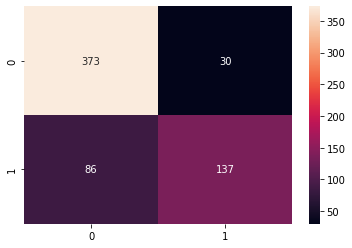

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



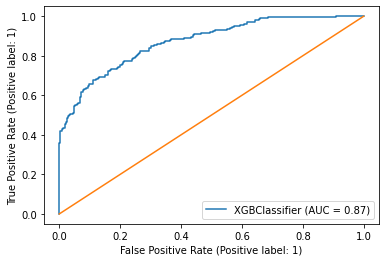

In [ ]:
print('XGB Classifier\n')
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score
xgb = XGBClassifier()
pred_xgb=xgb.fit(x_train, y_train)

y_xgb = xgb.predict(x_test)
print(metrics.classification_report(y_test, y_xgb))
print(modelAccuracy.append(metrics.accuracy_score(y_test, y_xgb)))

sns.heatmap(confusion_matrix(y_test, y_xgb), annot=True, fmt='d')
plt.show()
#plotting the ROC curve
plot_roc_curve(xgb,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()


#accuracy score
#acc_xgb = accuracy_score(y_test,pred_xgb)

In [ ]:
xgb.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score = 0.7937649880095923
Best params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Report: 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       403
           1       0.78      0.61      0.69       223

    accuracy                           0.80       626
   macro avg       0.79      0.76      0.77       626
weighted avg       0.80      0.80      0.79       626

confusion matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



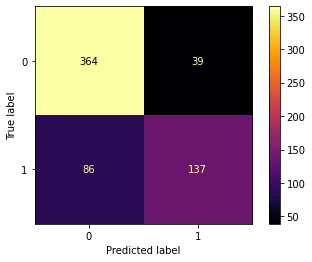

ROC curve :


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



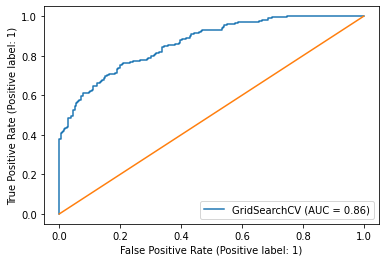

0.8003194888178914


In [ ]:
#hyper parameters
params = {'max_depth':[5,10,15],
          'learning_rate':[0.001,0.01,0.1],
          'n_estimators':[350,400,500]
         }
#initializing the grid
grid_xgb = GridSearchCV(estimator=xgb,param_grid=params,cv=3,verbose=3,n_jobs=-1)

#fitting for test data
pred_xgb = grid_xgb.fit(x_train,y_train).predict(x_test)

#printing best score and parameters
print('Best score = {}\nBest params = {}'.format(grid_xgb.best_score_,grid_xgb.best_params_))

#printing the report
print('Report: \n',classification_report(y_test,pred_xgb))

#confusion matrix
print('confusion matrix:')
plot_confusion_matrix(grid_xgb,x_test,y_test,cmap='inferno')
plt.show()

#plotting the ROC curve
print('ROC curve :')
plot_roc_curve(grid_xgb,x_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#accuracy score
acc_xgb = accuracy_score(y_test,pred_xgb)
print(acc_xgb)